In [2]:
import tc_functions as fun
import credentials

ds = fun.gfs_access(2018, 10, 10, 18, credentials.RDA_USER, credentials.RDA_PASSWORD)
dataset = fun.shear_stamp(30.2, -85.4, 800, ds, False, 550)
#dataset = fun.wind_stamp(30.2, -85.4, 800, 850, ds)

In [3]:
fun.vorticity_centroid(30.2, -85.4, 850, 150, 750, ds)

[30.416767, -85.53121948242188]

In [2]:
dataset.attrs

{'long_name': 'Circular stamp of wind data from GFS.',
 'units': 'meters/second',
 'center_lat': 30.2,
 'center_lon': 274.6,
 'pressure_level': 850.0,
 'stamp_radius': 800}

In [3]:
dataset = fun.sectorize(dataset, 0, 1, name = "straight", n_sector = 4)

In [5]:
dataset

<xarray.DataArray '200-850hPa_wind_shear' (component: 3, lat: 59, lon: 68)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * component        (component) <U9 'magnitude' 'u' 'v'
  * lat              (lat) >f4 37.5 37.25 37.0 36.75 ... 23.75 23.5 23.25 23.0
  * lon              (lon) >f4 266.2 266.5 266.8 267.0 ... 282.5 282.8 283.0
    sector_straight  (lat, lon) float64 1.0 1.0 1.0 1.0 1.0 ... 3.0 3.0 3.0 3.0
Attributes:
    long_name:                  200_850 hPa vertical wind shear
    units:                      meters/second
    center_lat:                 30.2
    center_lon:                 274.6
    stamp_radius:               800
    avg_shear:                  (4.1095815, 3.5511723)
    avg_magnitude:              5.431342767466527
    sector_straight_direction:  (0, 1)

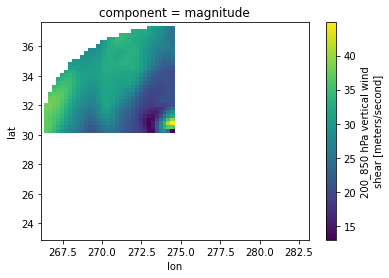

In [6]:
import numpy as np
dataset.where(np.isin(dataset.sector_straight, [1]))[0].plot()

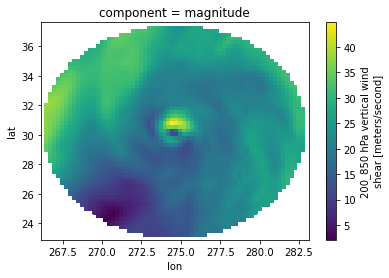

In [11]:
dataset[0].plot()

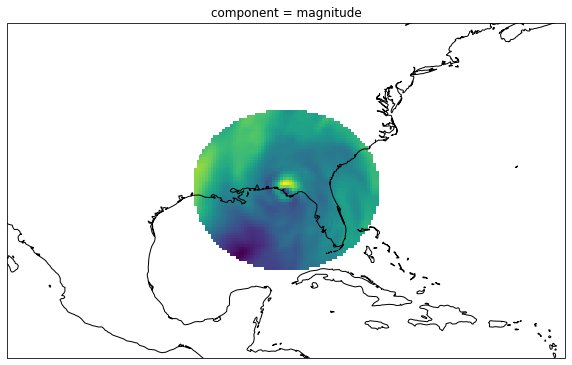

In [12]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import numpy as np

center_lat = dataset.attrs["center_lat"]
center_lon = dataset.attrs["center_lon"]
extent = [center_lon - 25, center_lon + 25, center_lat - 15, center_lat + 15]

plt.figure(figsize = (10, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
dataset.where(np.isin(dataset.sector_straight, [1, 2, 3, 4]))[0].plot.pcolormesh(ax = ax, transform = ccrs.PlateCarree(), x = 'lon', y = 'lat', add_colorbar = False)
ax.coastlines()
plt.show()

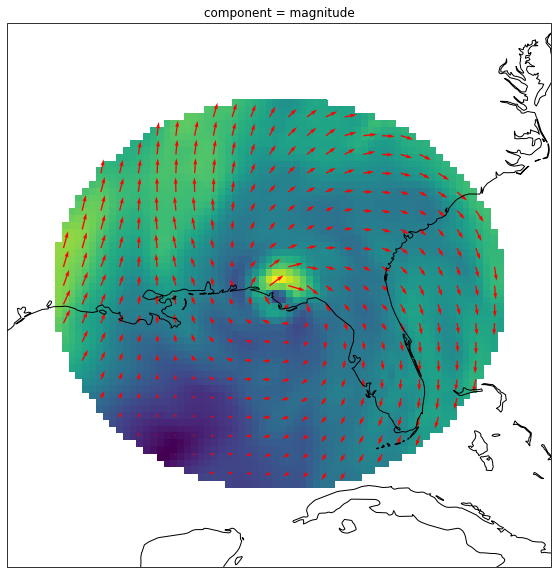

In [13]:
# Fix this plotting mess, then go back to the tc_functions and go back to circular and see if it works there. 

import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import numpy as np

center_lat = dataset.attrs["center_lat"]
center_lon = dataset.attrs["center_lon"]
extent = [center_lon - 10, center_lon + 10, center_lat - 10, center_lat + 10]

lat = dataset.coords['lat'].values
lon = dataset.coords['lon'].values

lon = np.where(lon > 180, lon - 360, lon)

u = dataset[1].values
v = dataset[2].values

plt.figure(figsize = (10, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines('50m')
dataset[0].plot.pcolormesh(ax = ax, transform = ccrs.PlateCarree(), x = 'lon', y = 'lat', add_colorbar = False)
ax.quiver(lon, lat, u, v, color = "red", transform = ccrs.PlateCarree(), regrid_shape = 30)
ax.plot(277.4362, 14.426229, markersize = 2, marker = 'o', color =  "black", transform = ccrs.PlateCarree())
plt.show()

In [7]:
rp = fun.radial_profile(dataset, stride = 10, h = 35, sector_labels = ["straight"], normalized=True)

ipykernel_launcher:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


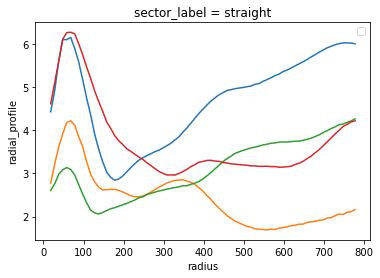

In [8]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.plot()
ax = plt.axes()
np.sqrt(np.power(rp[0,:,0],2) + np.power(rp[1,:,0],2)).plot.line(hue = "sector", ax = ax)
ax.legend()

ipykernel_launcher:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


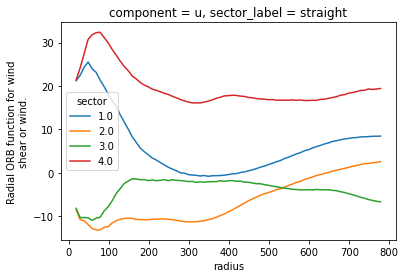

In [41]:
fig = plt.plot()
ax = plt.axes()
rp[0,:,0].plot.line(hue = 'sector', ax = ax)
#ax.legend()

In [1]:
# Get Kim's data and turn it into one file for easy import

import pandas as pd
import hurdat as h

# Import storms since 2015 from Kim's dataset that includes shortest distance to land, and do some maneuvering to make
# things closer to the HURDAT data straight from the website for east integration with the Hurdat() class (like column names, 
# naming convention for unnamed storms, and some additional columns)
nal_15 = pd.read_table("data/DTL_NAL_2015.txt", delimiter = ' ')
nal_16 = pd.read_table("data/DTL_NAL_2016.txt", delimiter = ' ')
nal_17 = pd.read_table("data/DTL_NAL_2017.txt", delimiter = ' ')
nal_18 = pd.read_table("data/DTL_NAL_2018.txt", delimiter = ' ')
nal_19 = pd.read_table("data/DTL_NAL_2019.txt", delimiter = ' ')
enp_15 = pd.read_table("data/DTL_ENP_2015.txt", delimiter = ' ')
enp_16 = pd.read_table("data/DTL_ENP_2016.txt", delimiter = ' ')
enp_17 = pd.read_table("data/DTL_ENP_2017.txt", delimiter = ' ')
enp_18 = pd.read_table("data/DTL_ENP_2018.txt", delimiter = ' ')
enp_19 = pd.read_table("data/DTL_ENP_2019.txt", delimiter = ' ')
total = pd.concat([nal_15, nal_16, nal_17, nal_18, nal_19, enp_15, enp_16, enp_17, enp_18, enp_19], ignore_index = True)

total.columns = ['YEAR', "PART_ID", "NAME", "DATETIME", "LAT", "LON", "WIND", "PRESSURE", "CATEGORY", "DISTANCE"]

total['DATETIME'] = pd.to_datetime(total['DATETIME'], format = "%Y%m%d%H")
total['NAME'] = total['NAME'].str.upper()
name_convert = {'UNNAMED04': 'FOUR', 
                'UNNAMED11': 'ELEVEN',
                'UNNAMED08': 'EIGHT'}
total['NAME'].loc[total['NAME'].str.contains('UNNAMED')] = [name_convert[x] for x in total['NAME'].loc[total['NAME'].str.contains('UNNAMED')]]
total['ID'] = total['PART_ID'] + total['YEAR'].astype(str)
hurdat_all = h.Hurdat(data = total)
# Filter storms by minimum intensity of 50
hurdat = hurdat_all.genesis_to_lysis_filter(minimum_wind = 50)
# Add RI / RW labels to all storm observations
hurdat.identify_events(threshold = 25)
# Add 250 km from land restriction as a column
hurdat.distance_to_land_label(min_distance = 250)

/Users/galen/anaconda3/envs/ada/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
hurdat.storms.to_csv('data/filtered_storm_list.csv', index = False)

In [1]:
import pandas as pd
import numpy as np
import xarray as xr

import credentials
import hurdat as h
import tc_functions as fun
import plotting_functions as tcplt

storm_data = pd.read_csv('data/filtered_storm_list.csv')
storm_data["DATETIME"] = pd.to_datetime(storm_data["DATETIME"])

In [14]:
unique_storms = np.unique(storm_data['ID'], return_counts=True)
unique_storms

(array(['AL012015', 'AL012016', 'AL012017', 'AL012018', 'AL022015',
        'AL022018', 'AL022019', 'AL032016', 'AL032017', 'AL032018',
        'AL042015', 'AL052016', 'AL052019', 'AL062015', 'AL062018',
        'AL072015', 'AL072016', 'AL072017', 'AL072018', 'AL082017',
        'AL082018', 'AL082019', 'AL092016', 'AL092017', 'AL092018',
        'AL092019', 'AL102016', 'AL102019', 'AL112015', 'AL112017',
        'AL122015', 'AL122016', 'AL122017', 'AL122018', 'AL132017',
        'AL132018', 'AL132019', 'AL142016', 'AL142017', 'AL142018',
        'AL142019', 'AL152016', 'AL152017', 'AL152018', 'AL162016',
        'AL162017', 'AL162018', 'AL162019', 'AL172017', 'AL182019',
        'AL192017', 'AL192019', 'AL202019', 'CP012015', 'CP012016',
        'CP012018', 'CP032015', 'CP042015', 'CP062015', 'CP072015',
        'EP012015', 'EP012019', 'EP022015', 'EP022018', 'EP022019',
        'EP032015', 'EP032016', 'EP032018', 'EP042016', 'EP042017',
        'EP042018', 'EP052015', 'EP052016', 'EP0

In [2]:
unique_storms = np.unique(storm_data['ID'])

#for id in unique_storms:
id = "AL012016"
#id = 'AL012015'
storm = storm_data[storm_data['ID'].str.match(id)]
storm = storm.reset_index(drop = True)
vws = []
centers = []
profiles = []
for index, datapoint in storm.iterrows():
    year = datapoint["DATETIME"].year
    month = datapoint["DATETIME"].month
    day = datapoint["DATETIME"].day
    hour = datapoint["DATETIME"].hour

    gfs_data = fun.gfs_access(year, month, day, hour, 
                                credentials.RDA_USER, credentials.RDA_PASSWORD)
    
    ### TODO: Figure out this whole storm centering thing. 
    # Find center in GFS data using best track as a seed:
    #centers.append(fun.vorticity_centroid(datapoint['LAT'], datapoint['LON'], 
    #                                      pressure = 850, search_radius = 200, calc_radius = 150,
    #                                      dataset = gfs_data))
    centers.append([datapoint['LAT'], datapoint['LON']])

    print("Doing #" + str(index+1) + "/" + str(storm.shape[0]))

    # Get wind shear with vortex removed (only for 2nd datapoint on... we only needed the center location for the 1st datapoint to calculate direction for the 2nd datapoint)
    if index != 0:
        vws.append(fun.shear_stamp(centers[index][0], centers[index][1], 800, gfs_data,
                   vortex_rm = False, vortex_rm_rad = 650))
                   #### CHANGE THIS BACK TO TRUE VORTEX REMOVE!!!

Doing #1/40
Doing #2/40
Doing #3/40
Doing #4/40
Doing #5/40
Doing #6/40
Doing #7/40
Doing #8/40
Doing #9/40
Doing #10/40
Doing #11/40
Doing #12/40
Doing #13/40
Doing #14/40
Doing #15/40
Doing #16/40
Doing #17/40
Doing #18/40
Doing #19/40
Doing #20/40
Doing #21/40
Doing #22/40
Doing #23/40
Doing #24/40
Doing #25/40
Doing #26/40
Doing #27/40
Doing #28/40
Doing #29/40
Doing #30/40
Doing #31/40
Doing #32/40
Doing #33/40
Doing #34/40
/Users/galen/Documents/Research/ADA/tc-wind-shear/tc_functions.py:372: RuntimeWarning: invalid value encountered in arccos
  np.cos(lat1_rad) * np.cos(lat2_rad) * np.cos(lon1_rad - lon2_rad)
Doing #35/40
Doing #36/40
Doing #37/40
Doing #38/40
Doing #39/40
Doing #40/40


In [7]:
# Calculate storm direction
for ii in range(storm.shape[0]-1):
    direction = (round(centers[ii + 1][1] - centers[ii][1], 5), round(centers[ii + 1][0] - centers[ii][0], 5))
    
    if direction == (0, 0):
        vws[ii].attrs['storm_direction'] = (0.01, 0)
    else:
        vws[ii].attrs['storm_direction'] = direction

In [8]:
# Sectorize according to both storm direction and shear direction, and then calculate radial profiles based on this
profiles = []
for ii in range(len(vws)):
    vws[ii] = fun.sectorize(vws[ii], vws[ii].attrs['avg_shear'][0], vws[ii].attrs['avg_shear'][1], "shear")
    vws[ii] = fun.sectorize(vws[ii], vws[ii].attrs['storm_direction'][0], vws[ii].attrs['storm_direction'][1], "velocity")
    profiles.append(fun.radial_profile(vws[ii], stride = 10, h = 35, sector_labels = ["shear", "velocity"]))
    tcplt.shear_map(vws[ii], "figures/" + id + "_" + str(ii) + ".png")

igure(figsize=(8,8))
/Users/galen/anaconda3/envs/ada/lib/python3.7/site-packages/cartopy/vector_transform.py:140: RuntimeWarning: invalid value encountered in cos
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)
/Users/galen/anaconda3/envs/ada/lib/python3.7/site-packages/cartopy/vector_transform.py:140: RuntimeWarning: invalid value encountered in sin
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)
/Users/galen/Documents/Research/ADA/tc-wind-shear/plotting_functions.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,8))
/Users/galen/anaconda3/envs/ada/lib/python3.7/site-packages/cartopy/vector_transform.py:140: RuntimeWarning: invalid value encountered in cos
  u, v = target_proj.transform_vectors(src_crs, x, y, 

In [9]:
# Collect all storm info into one xarray DataSet
stamp_radius = profiles[0].attrs['stamp_radius']
radius = np.array(profiles[0].radius)
component = np.array(profiles[0].component)
sector = np.array(profiles[0].sector)
time = np.array(storm["DATETIME"])[1:]
wind = np.array(storm["WIND"])[1:]
ri = np.array(storm["RI"])[1:]
rw = np.array(storm["RW"])[1:]
near_land = np.array(storm["NEAR_LAND"])[1:]
dist_to_land = np.array(storm["DISTANCE"])[1:]
center_lat = [profile.attrs['center_lat'] for profile in profiles]
center_lon = [profile.attrs['center_lon'] for profile in profiles]
velocity_direction_u = [profile.attrs['sector_velocity_direction'][0] for profile in profiles]
velocity_direction_v = [profile.attrs['sector_velocity_direction'][1] for profile in profiles]
shear_direction_u = [profile.attrs['sector_shear_direction'][0] for profile in profiles]
shear_direction_v = [profile.attrs['sector_shear_direction'][1] for profile in profiles]

shear_oriented = np.array([profile.values[:,:,0,:] for profile in profiles])
velocity_oriented = np.array([profile.values[:,:,1,:] for profile in profiles])

storm_profiles = xr.Dataset(
                {
                    'shear_oriented': (['time', 'component', 'radius', 'sector'], shear_oriented),
                    'velocity_oriented': (['time', 'component', 'radius', 'sector'], velocity_oriented)
                },
                coords = {
                    'time': time,
                    'component': component,
                    'radius': radius,
                    'sector': sector,
                    'ri': ('time', ri),
                    'rw': ('time', rw),
                    'near_land': ('time', near_land),
                    'wind': ('time', wind),
                    'dist_to_land': ('time', dist_to_land),
                    'center_lat': ('time', center_lat),
                    'center_lon': ('time', center_lon),
                    'shear_u': ('time', shear_direction_u),
                    'shear_v': ('time', shear_direction_v),
                    'velocity_u': ('time', velocity_direction_u),
                    'velocity_v': ('time', velocity_direction_v)  
                },
                attrs = {
                    'long_name': "Set of all radial profiles for an entire storm.",
                    'storm_id': id,
                    'stamp_radius': stamp_radius
                }
)

In [6]:
storm_profiles.shear_oriented

<xarray.DataArray 'shear_oriented' (time: 56, component: 2, radius: 77, sector: 4)>
array([[[[ -1.3514564 ,   9.99515343,   2.13457847, -11.21820068],
         [ -2.29278731,  11.02052879,   1.87614632, -12.69167709],
         [ -3.08998036,  11.45253277,   2.2988131 , -15.32313633],
         ...,
         [  8.32811642,   2.22995806,  11.74007702,   3.81865788],
         [  8.45972347,   2.37463307,  12.14840031,   3.87975502],
         [  8.53954983,   2.46371937,  12.46341515,   3.9207828 ]],

        [[  0.44228566,  -1.5706594 ,  13.27924633,  13.65816021],
         [ -3.09866643,  -3.98745322,  13.63147354,  13.74032784],
         [ -6.76541948,  -5.97693872,  13.71886921,  13.12520027],
         ...,
         [ -3.92130685, -12.66388035, -14.53964138, -22.20497894],
         [ -3.78662634, -12.61364937, -14.47904587, -22.27592278],
         [ -3.63921785, -12.54187965, -14.39145947, -22.27819443]]],


       [[[ -4.34948301,  13.0513773 ,   6.83640623, -16.47862816],
         [ -6.47346973,  14.95356846,   6.99832964, -18.91010666],
         [ -6.79044199,  17.86408806,   6.24751806, -20.43988037],
...
         [ 24.54143524,   7.31440687,  -1.14603913,   4.18042183],
         [ 24.05903816,   7.00099039,  -1.45792997,   4.3068471 ],
         [ 23.6823597 ,   6.73008204,  -1.74879003,   4.17070436]]],


       [[[-13.55441856, -15.15757275, -10.52488518,  -8.87091637],
         [-13.33253288, -15.2342577 , -10.18200779,  -7.15861177],
         [-12.98976612, -15.19315815, -10.00072861,  -5.29830313],
         ...,
         [  9.64181614,   3.19077373,  -9.32818031,   6.06607771],
         [  9.65930843,   3.44227672,  -9.28079987,   6.55106258],
         [  9.71327877,   3.72035432,  -9.24678898,   6.68571997]],

        [[ 24.31780815,  23.92538452,  18.56596756,  17.19580269],
         [ 24.13581848,  23.69152451,  17.68488884,  14.39242077],
         [ 23.97380257,  23.38374901,  17.00509453,  11.18313408],
         ...,
         [ 23.63245583,   0.08928455,   1.28335619,  12.92006207],
         [ 23.63040543,  -0.17646177,   1.39121997,  13.10878944],
         [ 23.62932014,  -0.43526861,   1.47026861,  13.1052618 ]]]])
Coordinates:
  * time          (time) datetime64[ns] 2016-10-05T18:00:00 ... 2016-10-19T12...
  * component     (component) <U1 'u' 'v'
  * radius        (radius) int64 18 28 38 48 58 68 ... 728 738 748 758 768 778
  * sector        (sector) float64 1.0 2.0 3.0 4.0
    ri            (time) bool False True True True ... False False False False
    rw            (time) bool False False False False ... False False False
    near_land     (time) bool False False False False ... False False False
    wind          (time) int64 50 50 55 60 75 90 75 60 ... 60 55 55 50 50 50 50
    dist_to_land  (time) int64 785 736 676 619 553 531 ... 1058 827 626 495 398
    center_lat    (time) float64 25.1 25.7 26.2 26.7 ... 53.0 55.1 57.0 59.0
    center_lon    (time) float64 296.7 296.1 295.5 295.2 ... 322.0 323.0 323.5
    shear_u       (time) float32 3.164 3.626 2.907 ... -1.327 -4.489 -2.062
    shear_v       (time) float32 -12.6 -13.23 -12.29 ... 13.13 13.34 9.725
    velocity_u    (time) float64 -0.8 -0.6 -0.6 -0.3 -0.3 ... 0.0 0.5 1.0 0.5
    velocity_v    (time) float64 0.4 0.6 0.5 0.5 0.6 0.2 ... 3.4 4.0 2.1 1.9 2.0

In [10]:
storm_profiles.velocity_oriented[0,0,:,:].plot.line(hue = 'sector')

In [11]:
storm_profiles

<xarray.Dataset>
Dimensions:            (component: 2, radius: 77, sector: 4, time: 56)
Coordinates: (12/15)
  * time               (time) datetime64[ns] 2016-10-05T18:00:00 ... 2016-10-...
  * component          (component) <U1 'u' 'v'
  * radius             (radius) int64 18 28 38 48 58 68 ... 738 748 758 768 778
  * sector             (sector) float64 1.0 2.0 3.0 4.0
    ri                 (time) bool False True True True ... False False False
    rw                 (time) bool False False False False ... False False False
    ...                 ...
    center_lat         (time) float64 25.1 25.7 26.2 26.7 ... 55.1 57.0 59.0
    center_lon         (time) float64 296.7 296.1 295.5 ... 322.0 323.0 323.5
    shear_u            (time) float32 5.24 6.68 5.286 ... 3.895 -0.5453 -0.6099
    shear_v            (time) float32 -13.22 -13.78 -12.84 ... 11.84 12.76 11.22
    velocity_u         (time) float64 -0.8 -0.6 -0.6 -0.3 ... 0.0 0.5 1.0 0.5
    velocity_v         (time) float64 0.4 0.6 0.5 0.5 0.6 ... 4.0 2.1 1.9 2.0
Data variables:
    shear_oriented     (time, component, radius, sector) float64 4.318 ... 8.423
    velocity_oriented  (time, component, radius, sector) float64 4.349 ... 3.722
Attributes:
    long_name:     Set of all radial profiles for an entire storm.
    storm_id:      AL152016
    stamp_radius:  800

In [12]:
storm_profiles.to_netcdf("data/prof_"+id+".nc")

In [25]:
# Drop all leading storms from the hurdat data, as we are done using them (do this once you are fully done with the above proccess)
hurdat.drop_leading()

In [ ]:
# For each storm:
    # Find center in GFS data
    # Calculate storm motion direction based on this center
    # Remove vorticity (do this within the wind_shear function?)
    # Calculate wind shear field
    # Calculate area-averaged wind shear vector
    # Quandrantize for both storm direciton and shear direction
    # Calculate 8 radial profiles

In [5]:
#for id in unique_storms:
id = "AL152016"
#id = 'AL012015'
storm = hurdat.get_tc_by_id(id)
datapoint = storm.iloc[24]

year = datapoint["DATETIME"].year
month = datapoint["DATETIME"].month
day = datapoint["DATETIME"].day
hour = datapoint["DATETIME"].hour

In [6]:
gfs_data = fun.gfs_access(year, month, day, hour, 
                            credentials.RDA_USER, credentials.RDA_PASSWORD)

In [7]:
vws = fun.shear_stamp(datapoint["LAT"], datapoint["LON"], 800, gfs_data,
                      vortex_rm = True, vortex_rm_rad = 650)

In [8]:
curl = np.gradient(vws.sel(component = "u").values, axis = 0) - np.gradient(vws.sel(component = "v").values, axis = 1) 

/Users/galen/anaconda3/envs/ada/lib/python3.7/site-packages/cartopy/vector_transform.py:140: RuntimeWarning: invalid value encountered in cos
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)
/Users/galen/anaconda3/envs/ada/lib/python3.7/site-packages/cartopy/vector_transform.py:140: RuntimeWarning: invalid value encountered in sin
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)


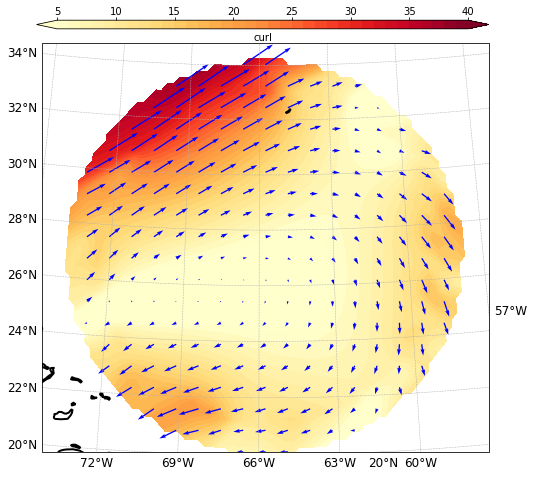

In [9]:
import cartopy.crs as ccrs       # cartopy 0.18.0
import cartopy.feature as cfeature

import matplotlib.pyplot as plt  # matplotlib 3.3.0
import matplotlib.ticker as mticker
import numpy as np               # numpy 1.19.4
import xarray as xr              # xarray 0.16.2

x = vws

tclat = x.attrs["center_lat"]
tclon = x.attrs["center_lon"]
if tclon > 180:
    tclon = tclon - 360

lat_vals = x.lat.values
lon_vals = x.lon.values

glat, glon = [y.T for y in np.meshgrid(lat_vals, lon_vals)]
glon[glon>180.] -= 360.

mag = vws.sel(component = "magnitude").values
u = vws.sel(component = "u").values
v = vws.sel(component = "v").values

plt.ioff()

## Add lat/lon lines and ensure labels occur within the domain at reasonable intervals
def prettylines(clon, clat):
    gl = ax.gridlines(crs=pc, draw_labels=False, linewidth=0.5, linestyle='dashed')
    gl.xlocator = mticker.FixedLocator(np.arange(-180.,1.,3.))
    gl.ylocator = mticker.FixedLocator(np.arange(0.,61.,2.))
    gl2 = ax.gridlines(crs=pc, draw_labels=True, x_inline=False, linewidth=0.)
    gl2.right_labels, gl2.top_labels, gl2.rotate_labels = [False] * 3
    xmin, xmax = [np.ceil((clon-9.)/3.)*3., np.floor((clon+9.)/3.)*3.+1.]
    ymin, ymax = [np.ceil((clat-9.)/2.)*2., np.floor((clat+9.)/2.)*2.+1.]
    gl2.xlocator = mticker.FixedLocator(np.arange(xmin,xmax,3.))
    gl2.ylocator = mticker.FixedLocator(np.arange(ymin,ymax,2.))
    gl2.xlabel_style = {'size': 12}
    gl2.ylabel_style = {'size': 12}

proj = ccrs.LambertConformal(central_longitude=tclon, central_latitude=tclat)
pc = ccrs.PlateCarree()  # required for cartopy to plot dimensions of latitude and longitude

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=proj)
ax.set_extent([np.min(glon),np.max(glon),np.min(glat),np.max(glat)], crs=pc)  # center domain on TC latitude & longitude
ax.coastlines('50m', linewidth=2., zorder=9)
im = ax.contourf(glon, glat, mag, np.arange(5.,40.1,1.), 
                cmap=plt.get_cmap('YlOrRd'), extend='both', transform=pc, zorder=1)  # shading for shear magnitude
pos = ax.get_position()
left = pos.x0 - 0.01
bottom = pos.y1 + 0.025
width = pos.x1 - left
height = 0.015
cax = fig.add_axes([left, bottom, width, height])
cbar = plt.colorbar(im, cax=cax, ticks=np.arange(5.,40.1,5.), orientation='horizontal')
cax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(labelsize=10, pad=0)
cbar.set_label('curl', size=10)
prettylines(tclon, tclat)

ax.quiver(glon, glat, u, v, color = "blue", transform = ccrs.PlateCarree(), regrid_shape = 20)

plt.show()

In [16]:
import cartopy.crs as ccrs       # cartopy 0.18.0
import cartopy.feature as cfeature

import matplotlib.pyplot as plt  # matplotlib 3.3.0
import matplotlib.ticker as mticker
import numpy as np               # numpy 1.19.4
import xarray as xr              # xarray 0.16.2

x = vws

tclat = x.attrs["center_lat"]
tclon = x.attrs["center_lon"]
if tclon > 180:
    tclon = tclon - 360

lat_vals = x.lat.values
lon_vals = x.lon.values

glat, glon = [y.T for y in np.meshgrid(lat_vals, lon_vals)]
glon[glon>180.] -= 360.

plt.ioff()

## Add lat/lon lines and ensure labels occur within the domain at reasonable intervals
def prettylines(clon, clat):
    gl = ax.gridlines(crs=pc, draw_labels=False, linewidth=0.5, linestyle='dashed')
    gl.xlocator = mticker.FixedLocator(np.arange(-180.,1.,3.))
    gl.ylocator = mticker.FixedLocator(np.arange(0.,61.,2.))
    gl2 = ax.gridlines(crs=pc, draw_labels=True, x_inline=False, linewidth=0.)
    gl2.right_labels, gl2.top_labels, gl2.rotate_labels = [False] * 3
    xmin, xmax = [np.ceil((clon-9.)/3.)*3., np.floor((clon+9.)/3.)*3.+1.]
    ymin, ymax = [np.ceil((clat-9.)/2.)*2., np.floor((clat+9.)/2.)*2.+1.]
    gl2.xlocator = mticker.FixedLocator(np.arange(xmin,xmax,3.))
    gl2.ylocator = mticker.FixedLocator(np.arange(ymin,ymax,2.))
    gl2.xlabel_style = {'size': 12}
    gl2.ylabel_style = {'size': 12}

proj = ccrs.LambertConformal(central_longitude=tclon, central_latitude=tclat)
pc = ccrs.PlateCarree()  # required for cartopy to plot dimensions of latitude and longitude

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=proj)
ax.set_extent([np.min(glon),np.max(glon),np.min(glat),np.max(glat)], crs=pc)  # center domain on TC latitude & longitude
ax.coastlines('50m', linewidth=2., zorder=9)
im = ax.contourf(glon, glat, curl, np.arange(-3.,3.,.1), 
                cmap=plt.get_cmap('PiYG'), extend='both', transform=pc, zorder=1)  # shading for shear magnitude
pos = ax.get_position()
left = pos.x0 - 0.01
bottom = pos.y1 + 0.025
width = pos.x1 - left
height = 0.015
cax = fig.add_axes([left, bottom, width, height])
cbar = plt.colorbar(im, cax=cax, ticks=np.arange(-3.1,3.1,1.), orientation='horizontal')
cax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(labelsize=10, pad=0)
cbar.set_label('curl', size=10)
prettylines(tclon, tclat)
plt.savefig("curl_example.png")
#plt.show()

In [15]:
plt.savefig("curl_example.png")

In [11]:
np.nanmax(curl)

2.725